In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [83]:
df = pd.read_csv('./Dataset/cardekho_dataset.csv', index_col=[0])

In [84]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [85]:
df.shape


(15411, 13)

In [86]:
df.describe()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [88]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [89]:
# Proportion of each unique values of categorical column 
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
---------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Min

In [90]:
df.isnull().sum()


car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [91]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


In [92]:
df.car_name.value_counts()[0:10]


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [93]:
df.brand.value_counts()[0:10]


brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

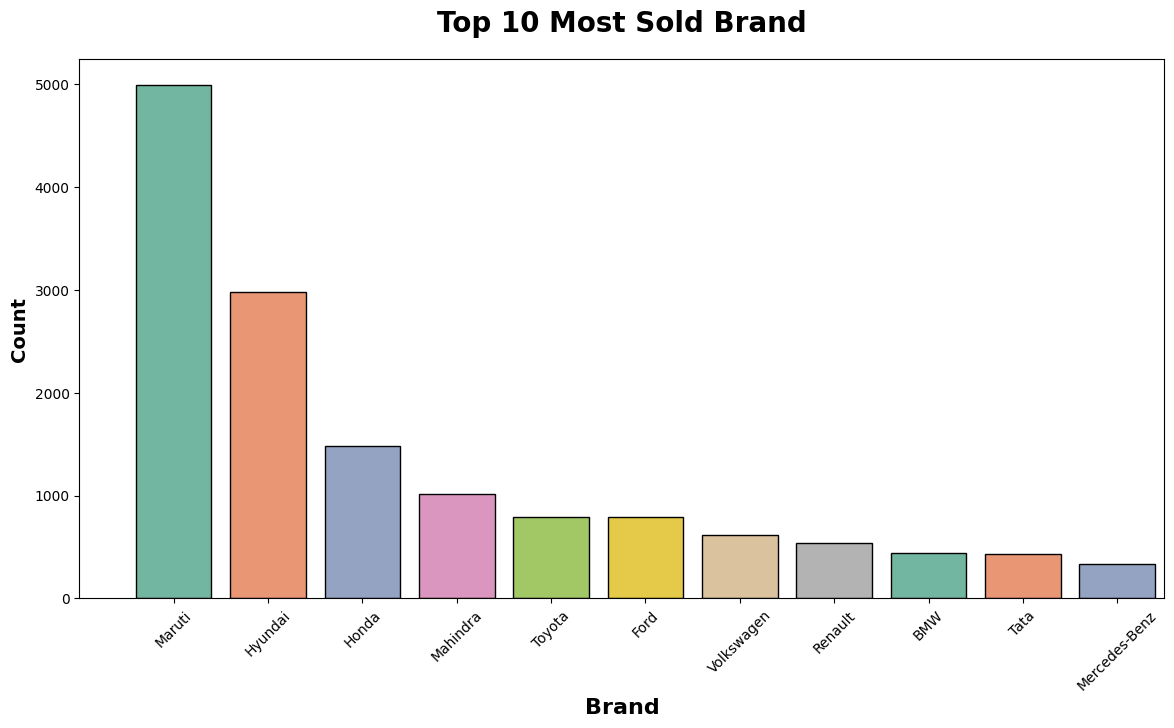

In [94]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [95]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


In [96]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


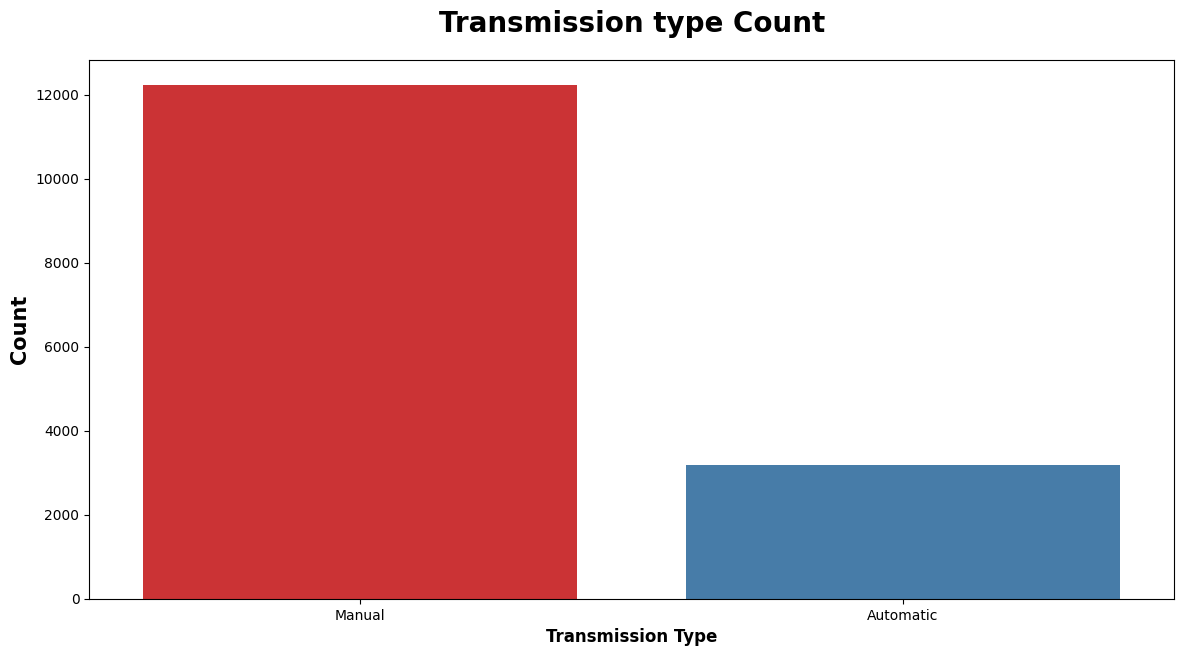

In [97]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

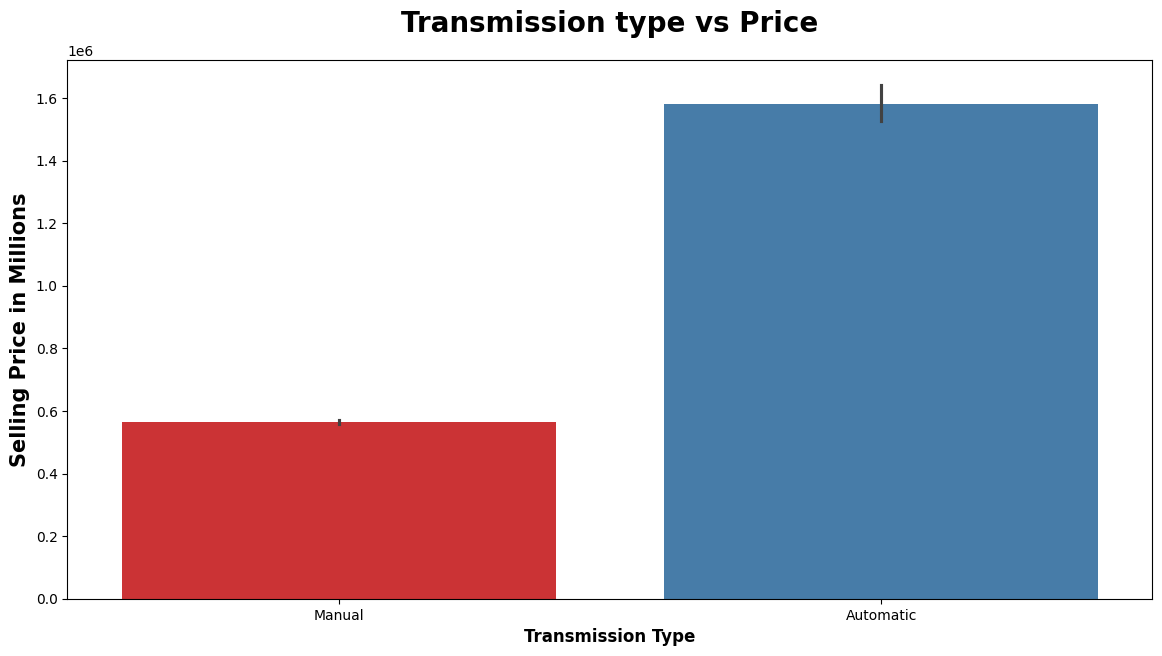

In [98]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [99]:
pd.pandas.set_option("display.max_columns", None)
(df.shape)


(15411, 13)

In [100]:
df.isnull().sum()


car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [101]:
df.drop_duplicates(inplace=True)


In [102]:
df.duplicated().sum()

0

In [103]:
df.shape

(15244, 13)

In [104]:
df.loc[df['brand']== 'Ferrari']


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000


In [105]:
df.drop(['brand','model'], axis=1, inplace=True)


In [106]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [107]:

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [108]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


In [109]:
import statsmodels.api as sm
num_features = df.select_dtypes(exclude="object").columns
for i in range(0, len(num_features)-1):
    x = df.loc[:, df.columns == num_features[i]]
    y = df.selling_price
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            num_features[i], vif)
        )

Variance Inflation Factor of vehicle_age column is 1.34 

Variance Inflation Factor of km_driven column is 1.24 

Variance Inflation Factor of mileage column is 1.54 

Variance Inflation Factor of engine column is 2.4 

Variance Inflation Factor of max_power column is 3.13 

Variance Inflation Factor of seats column is 1.77 



In [110]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [111]:
for col in continuous_features:
         detect_outliers(col)


 #### km_driven ####
percentile25 30000.0
percentile75 70000.0
Upper limit 130000.0
Lower limit -30000.0

 #### mileage ####
percentile25 17.0
percentile75 22.7
Upper limit 31.25
Lower limit 8.450000000000001

 #### engine ####
percentile25 1197.0
percentile75 1582.0
Upper limit 2159.5
Lower limit 619.5

 #### max_power ####
percentile25 74.0
percentile75 117.3
Upper limit 182.25
Lower limit 9.050000000000011

 #### selling_price ####
percentile25 385000.0
percentile75 825000.0
Upper limit 1485000.0
Lower limit -275000.0


In [112]:
df[continuous_features].skew(axis=0, skipna=True)


km_driven        0.615394
mileage          0.072578
engine           0.683865
max_power        1.066170
selling_price    0.967940
dtype: float64

In [113]:
df[continuous_features].skew(axis=0, skipna=True)


km_driven        0.615394
mileage          0.072578
engine           0.683865
max_power        1.066170
selling_price    0.967940
dtype: float64

In [114]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000


In [115]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [116]:
df['fuel_type'] = df['fuel_type'].map({'Petrol':0,'Diesel':1,'CNG':2, 'LPG': 3,'Electric':4})


In [117]:
df['fuel_type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [118]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [119]:
df['seller_type'] = df['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})


In [120]:
df['seller_type'].unique()

array([0, 1, 2], dtype=int64)

In [121]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [122]:
df['transmission_type']=df['transmission_type'].map({'Manual':0,'Automatic':1})

In [123]:
df['transmission_type'].unique()

array([0, 1], dtype=int64)

In [124]:
df.to_csv('Cleaned_car.csv')

In [125]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,0,0,0,19.70,796.0,46.30,5,120000
1,Hyundai Grand,5,20000,0,0,0,18.90,1197.0,82.00,5,550000
2,Hyundai i20,11,60000,0,0,0,17.00,1197.0,80.00,5,215000
3,Maruti Alto,9,37000,0,0,0,20.92,998.0,67.10,5,226000
4,Ford Ecosport,6,30000,1,1,0,22.77,1498.0,98.59,5,570000


In [126]:
X_car=df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [127]:
X_car

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,9,120000,0,0,0,19.70,796.0,46.30,5
1,Hyundai Grand,5,20000,0,0,0,18.90,1197.0,82.00,5
2,Hyundai i20,11,60000,0,0,0,17.00,1197.0,80.00,5
3,Maruti Alto,9,37000,0,0,0,20.92,998.0,67.10,5
4,Ford Ecosport,6,30000,1,1,0,22.77,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,9,10723,1,0,0,19.81,1086.0,68.05,5
19540,Maruti Ertiga,2,18000,1,0,0,17.50,1373.0,91.10,7
19541,Skoda Rapid,6,67000,1,1,0,21.14,1498.0,103.52,5
19542,Mahindra XUV500,5,130000,1,1,0,16.00,2159.5,140.00,7


In [128]:
X = df.drop(['car_name','selling_price'],axis=1)
y = df['selling_price']

In [129]:
X

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,9,120000,0,0,0,19.70,796.0,46.30,5
1,5,20000,0,0,0,18.90,1197.0,82.00,5
2,11,60000,0,0,0,17.00,1197.0,80.00,5
3,9,37000,0,0,0,20.92,998.0,67.10,5
4,6,30000,1,1,0,22.77,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...
19537,9,10723,1,0,0,19.81,1086.0,68.05,5
19540,2,18000,1,0,0,17.50,1373.0,91.10,7
19541,6,67000,1,1,0,21.14,1498.0,103.52,5
19542,5,130000,1,1,0,16.00,2159.5,140.00,7


In [130]:
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
19537     250000
19540     925000
19541     425000
19542    1225000
19543    1200000
Name: selling_price, Length: 15244, dtype: int64

In [131]:
#splitting into train and test data
from sklearn.model_selection import train_test_split


In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [133]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [134]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
y_pred1 = rf.predict(X_test)
y_pred2 = xg.predict(X_test)


In [136]:
from sklearn import metrics


In [137]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)


In [138]:
print(score1,score2)


0.927049008442033 0.9341519451460554


In [139]:
final_data = pd.DataFrame({'Models':['RF','XG'],
             "R2_SCORE":[score1,score2]})

In [140]:
final_data


,Models,R2_SCORE
0,RF,0.927049
1,XG,0.934152


In [141]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,0,0,0,19.70,796.0,46.30,5,120000
1,Hyundai Grand,5,20000,0,0,0,18.90,1197.0,82.00,5,550000
2,Hyundai i20,11,60000,0,0,0,17.00,1197.0,80.00,5,215000
3,Maruti Alto,9,37000,0,0,0,20.92,998.0,67.10,5,226000
4,Ford Ecosport,6,30000,1,1,0,22.77,1498.0,98.59,5,570000


In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_car,y,test_size=0.2)

In [143]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [144]:
ohe=OneHotEncoder()
ohe.fit(X_car[['car_name']])

OneHotEncoder()

In [145]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['car_name']),
                                    remainder='passthrough')

In [146]:
xg = XGBRegressor()
#xg_final = xg.fit(X,y)

In [147]:
xg_final=make_pipeline(column_trans,xg)


In [148]:
xg_final.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', 'BMW 3', 'BMW 5',
       'BMW 6', 'BMW 7', 'BMW X1', 'BMW X3', 'BMW X4', 'BMW X5', 'BMW Z4',
       'Bentley Continental', 'Datsun GO', 'Datsun RediGO',
       'Datsun redi-GO', 'Ferrari GTC4Lusso', 'Force Gurkha',
       'Ford As...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [149]:
y_pred=xg_final.predict(X_test)


In [150]:
r2_score(y_test,y_pred)


0.9416870436659665

In [ ]:
scores=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X_car,y,test_size=0.1,random_state=i)
    xg = XGBRegressor()
    xg_final=make_pipeline(column_trans,xg)
    xg_final.fit(X_train,y_train)
    y_pred=xg_final.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

In [ ]:
scores[np.argmax(scores)]


In [ ]:
xg_final.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Alto',9,37000,0,0,0,20.92,998.0,67.10,5]).reshape(1,10)))


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_car,y,test_size=0.1,random_state=np.argmax(scores))
xg=XGBRegressor()
xg_final=make_pipeline(column_trans,xg)
xg_final.fit(X_train,y_train)
y_pred=xg_final.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
import pickle

In [ ]:
pickle.dump(xg_final,open('XGBoost_Model.pkl','wb'))


In [ ]:
model=pickle.load(open('XGBoost_Model.pkl','rb'))

In [ ]:
xg_final.predict(pd.DataFrame(columns=['car_name','vehicle_age','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats'],data=np.array(['Maruti Alto',9,37000,0,0,0,20.92,998.0,67.10,5]).reshape(1,10)))
